## Principle component Analysis

In [25]:
import plotly.express as px
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (150, 4)
Reduced shape: (150, 2)


In [29]:
X.shape, X_pca.shape

((150, 4), (150, 2))

In [34]:
x1 = pd.DataFrame(X)
x1.columns

RangeIndex(start=0, stop=4, step=1)

In [37]:
x1.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
X_pca1 = pd.DataFrame(X_pca)

In [39]:
X_pca1.describe()

,0,1
count,1.500000e+02,1.500000e+02
mean,-2.842171e-15,-8.940996e-16
std,2.056269e+00,4.926162e-01
min,-3.223804e+00,-1.265971e+00
25%,-2.530348e+00,-3.254152e-01
50%,5.546193e-01,-2.215678e-02
75%,1.550143e+00,3.249152e-01
max,3.795645e+00,1.374165e+00


In [40]:
pca3 = PCA(0.99)
X_pca3 = pca3.fit_transform(X)

In [41]:
X_pca3.shape

(150, 3)

In [49]:
X_pca3a =  pd.DataFrame(X_pca3)
X_pca3a.describe()

,0,1,2
count,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.842171e-15,-8.940996e-16,-3.286260e-16
std,2.056269e+00,4.926162e-01,2.796596e-01
min,-3.223804e+00,-1.265971e+00,-6.941468e-01
25%,-2.530348e+00,-3.254152e-01,-2.054996e-01
50%,5.546193e-01,-2.215678e-02,1.639215e-02
75%,1.550143e+00,3.249152e-01,1.758214e-01
max,3.795645e+00,1.374165e+00,7.601654e-01


In [11]:
import plotly.express as px
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
colors=['#BC5308', '#FFECD1', '#C5CAB8', '#FF7D00', '#8AA79F', '#FFB569', '#15616D', '#001524']
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Import data
dfpac=pd.read_csv("HR_comma_sep.csv")
dfpac.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [52]:
# reducing columns from 8 to 2
numerical_features = dfpac.select_dtypes(include=['int64', 'float64'])

# Dropping any rows with missing values for simplicity
numerical_features.dropna(inplace=True)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
numerical_features_pca = pca.fit_transform(numerical_features)

print("Original shape:", numerical_features.shape)
print("Reduced shape:", numerical_features_pca.shape)

Original shape: (14999, 8)
Reduced shape: (14999, 2)


In [14]:
import pandas as pd
from sklearn.decomposition import PCA
#Access the loadings (components) of each principal component
components = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(components, columns=numerical_features.columns)

print("Loadings of each feature in the principal components:")
print(loadings_df)

Loadings of each feature in the principal components:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            -0.00010         0.001165        0.010302              0.999939   
1            -0.02228         0.015305        0.271231             -0.006433   

   time_spend_company  Work_accident      left  promotion_last_5years  
0            0.003739      -0.000071  0.000608              -0.000010  
1            0.961233       0.000285  0.040683               0.006197  


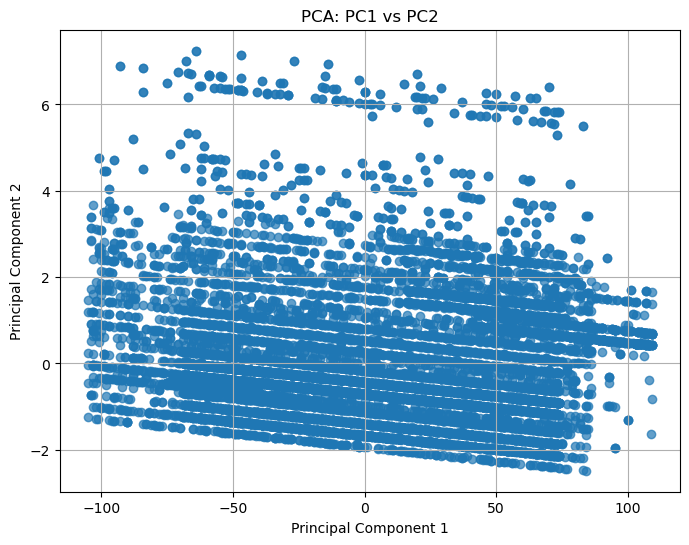

In [15]:
import matplotlib.pyplot as plt

# Extract PC1 and PC2 from the transformed data
PC1 = numerical_features_pca[:, 0]
PC2 = numerical_features_pca[:, 1]

# Create a scatter plot of PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(PC1, PC2, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs PC2')
plt.grid(True)
plt.show()

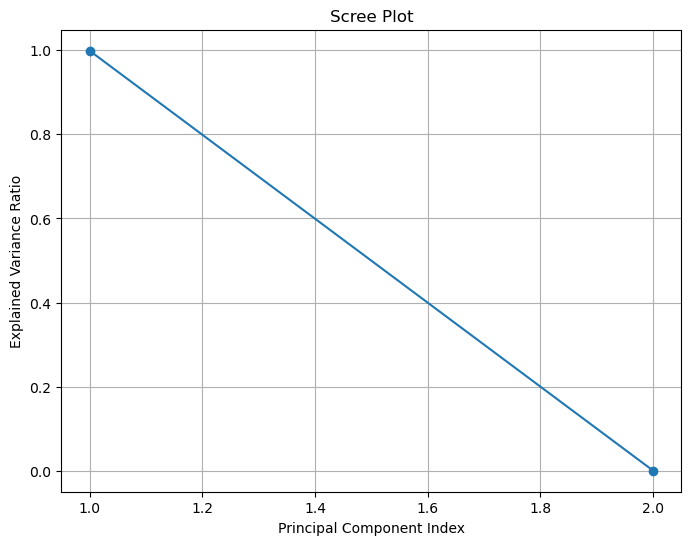

Original shape: (14999, 8)
Reduced shape: (14999, 2)


In [16]:
# Extract explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

print("Original shape:", numerical_features.shape)
print("Reduced shape:", numerical_features_pca.shape)

In [17]:
pca.explained_variance_ratio_

array([9.98493202e-01, 8.70506158e-04])

In [19]:
pca1 = PCA(0.95)

In [50]:

numerical_features = dfpac.select_dtypes(include=['int64', 'float64'])
# Dropping any rows with missing values for simplicity
numerical_features.dropna(inplace=True)

# Apply PCA for dimensionality reduction
pca1 = PCA(0.8)
numerical_features_pca1 = pca1.fit_transform(numerical_features)

print("Original shape:", numerical_features.shape)
print("Reduced shape:", numerical_features_pca1.shape)

Original shape: (14999, 8)
Reduced shape: (14999, 1)
